# Clasificación Básica: Predecir una imagen de moda

Entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta.

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [6]:
print(f"Imágenes que hay en el train: {len(X_train)}")

Imágenes que hay en el train: 60000


In [7]:
print(f"Imagenes que hay en el test: {len(X_test)}")

Imagenes que hay en el test: 10000


In [8]:
#¿Cuántos píxeles tiene la imagen?
print(f"La imagen se compone de: {X_train.shape[1]}x{X_train.shape[2]} píxeles")

La imagen se compone de: 28x28 píxeles


In [9]:
#¿Cuáles son los valores de los labels?
print(f"Valores de los labels: {np.unique(y_train)}")

Valores de los labels: [0 1 2 3 4 5 6 7 8 9]


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

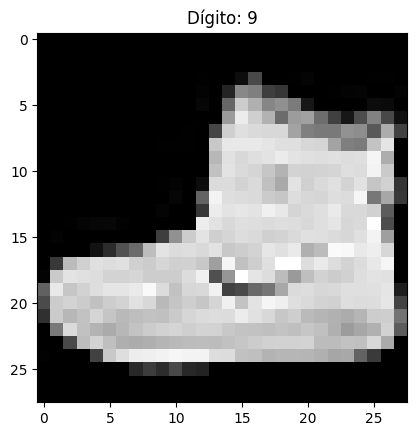

In [10]:
#Obtenemos la primera imagen del conjunto de entrenamiento.
primera_imagen = X_train[0]

# Mostramos la imagen empleando para ello la función imshow de matplotlib
plt.imshow(primera_imagen, cmap='gray')
plt.title(f"Dígito: {y_train[0]}")
plt.axis('on')
plt.show()

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [11]:
# Escalar los conjuntos de train y test
#(Para que sus valores estén en el rango de 0 a 1, dividimos directamente cada conjunto por 255) 
#255 ya que es el valor máximo de escala de grises.
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
#Para verificarlo podemos realizar el siguiente proceso:
print(f"Valores en X_train: mínimo={X_train.min()}, máximo={X_train.max()}")
print(f"Valores en X_test: mínimo={X_test.min()}, máximo={X_test.max()}")

Valores en X_train: mínimo=0.0, máximo=1.0
Valores en X_test: mínimo=0.0, máximo=1.0


Estamos listos, tras ello, para poder realizar el modelo de red neuronal.

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [13]:
X_train.shape

(60000, 28, 28)

In [ ]:
modelo = keras.models.Sequential()
#Definimos nuestra capa de entrada
modelo.add(keras.layers.Flatten(input_shape=(28, 28)))
#Definimos un "Hidden layer" (Capa Oculta)
modelo.add(keras.layers.Dense(units = 300,activation='relu')) #pendiente, si tiene valor positivo lo deja en positivo, si tiene valor negativo, lo deja en 0. (Ideal para entrenamiento)
# Hidden layer
modelo.add(keras.layers.Dense(units = 100,activation='relu'))
#Definimos nuestra capa de salida
modelo.add(keras.layers.Dense(units = 10,activation='softmax'))

C:\Users\jonam\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
print(modelo.layers[0]) #Podemos ver las capas y acceder a los elementos.

<Flatten name=flatten, built=True>


In [16]:
modelo.summary() #Vemos un resumen de nuestro modelo.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [17]:
modelo.compile(
    optimizer = keras.optimizers.SGD(), #optimizer = keras.optimizers.SGD() (EQUIVALENTE!!)
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [18]:
# Summary
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [19]:
history = modelo.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 10, #Comenzamos el entrenamiento con 10 epochs
    validation_data = (X_test, y_test) # validation_split = 0.1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5883 - loss: 1.3916 - val_accuracy: 0.7681 - val_loss: 0.7069
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7903 - loss: 0.6499 - val_accuracy: 0.8011 - val_loss: 0.5929
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8161 - loss: 0.5533 - val_accuracy: 0.8093 - val_loss: 0.5500
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8250 - loss: 0.5116 - val_accuracy: 0.8244 - val_loss: 0.5113
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8313 - loss: 0.4908 - val_accuracy: 0.8296 - val_loss: 0.4957
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8398 - loss: 0.4637 - val_accuracy: 0.8340 - val_loss: 0.4803
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8438 - loss: 0.4479 - val_accuracy: 0.8350 - val_loss: 0.4732
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8477 - loss: 0.4417 - val_accurac

In [20]:
# print(history.params)
# print(history.epoch)
print(history.history) #Histórico del entrenamiento, para así a continuación representarlo.

{'accuracy': [0.6906499862670898, 0.7969833612442017, 0.8178499937057495, 0.8273500204086304, 0.8346333503723145, 0.8403000235557556, 0.8446666598320007, 0.849133312702179, 0.8514666557312012, 0.853950023651123], 'loss': [1.0213432312011719, 0.623577356338501, 0.5453723073005676, 0.5063446760177612, 0.4813387095928192, 0.4627254605293274, 0.448586642742157, 0.43692004680633545, 0.42821362614631653, 0.42023149132728577], 'val_accuracy': [0.7681000232696533, 0.8011000156402588, 0.8093000054359436, 0.824400007724762, 0.8295999765396118, 0.8339999914169312, 0.8349999785423279, 0.8353000283241272, 0.8353999853134155, 0.8420000076293945], 'val_loss': [0.7069097757339478, 0.592922031879425, 0.5499787330627441, 0.5113025307655334, 0.4957220256328583, 0.4803254008293152, 0.47315800189971924, 0.4656517505645752, 0.4659517705440521, 0.44572314620018005]}


In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.690650,1.021343,0.7681,0.706910
1,0.796983,0.623577,0.8011,0.592922
2,0.817850,0.545372,0.8093,0.549979
3,0.827350,0.506345,0.8244,0.511303
4,0.834633,0.481339,0.8296,0.495722
5,0.840300,0.462725,0.8340,0.480325
6,0.844667,0.448587,0.8350,0.473158
7,0.849133,0.436920,0.8353,0.465652
8,0.851467,0.428214,0.8354,0.465952
9,0.853950,0.420231,0.8420,0.445723


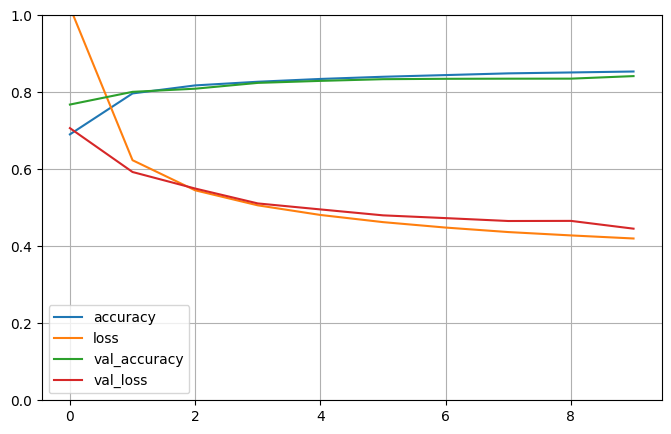

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Vamos a realizar este proceso, empleando para ello: 15 epochs

In [24]:
history2 = modelo.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 15, #Comenzamos el entrenamiento con 10 epochs
    validation_data = (X_test, y_test) # validation_split = 0.1
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8577 - loss: 0.4139 - val_accuracy: 0.8365 - val_loss: 0.4580
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8594 - loss: 0.4090 - val_accuracy: 0.8452 - val_loss: 0.4373
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8618 - loss: 0.4010 - val_accuracy: 0.8514 - val_loss: 0.4257
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8614 - loss: 0.4013 - val_accuracy: 0.8518 - val_loss: 0.4262
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8678 - loss: 0.3881 - val_accuracy: 0.8522 - val_loss: 0.4209
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8676 - loss: 0.3861 - val_accuracy: 0.8474 - val_loss: 0.4337
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8685 - loss: 0.3793 - val_accuracy: 0.8555 - val_loss: 0.4142
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8701 - loss: 0.3742 - val_accu

In [25]:
# print(history.params)
# print(history.epoch)
print(history2.history)

{'accuracy': [0.8561166524887085, 0.8607666492462158, 0.8608333468437195, 0.8634333610534668, 0.8657833337783813, 0.8675500154495239, 0.867983341217041, 0.8687499761581421, 0.8707666397094727, 0.8725333213806152, 0.872783362865448, 0.8735666871070862, 0.8748833537101746, 0.8754333257675171, 0.8777833580970764], 'loss': [0.4119722247123718, 0.40460672974586487, 0.39964842796325684, 0.39377647638320923, 0.38815996050834656, 0.3830157518386841, 0.3785800635814667, 0.3746938109397888, 0.3706457316875458, 0.365842342376709, 0.36293691396713257, 0.3597031235694885, 0.35681217908859253, 0.35400891304016113, 0.34867122769355774], 'val_accuracy': [0.8364999890327454, 0.8452000021934509, 0.8514000177383423, 0.8518000245094299, 0.8521999716758728, 0.8474000096321106, 0.8554999828338623, 0.8568000197410583, 0.8495000004768372, 0.8565999865531921, 0.847599983215332, 0.8592000007629395, 0.8629999756813049, 0.8582000136375427, 0.8604999780654907], 'val_loss': [0.45803219079971313, 0.43729305267333984

In [26]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [27]:
pd.DataFrame(history2.history)

,accuracy,loss,val_accuracy,val_loss
0,0.856117,0.411972,0.8365,0.458032
1,0.860767,0.404607,0.8452,0.437293
2,0.860833,0.399648,0.8514,0.425744
3,0.863433,0.393776,0.8518,0.426189
4,0.865783,0.388160,0.8522,0.420946
5,0.867550,0.383016,0.8474,0.433688
6,0.867983,0.378580,0.8555,0.414179
7,0.868750,0.374694,0.8568,0.412796
8,0.870767,0.370646,0.8495,0.431263
9,0.872533,0.365842,0.8566,0.414597


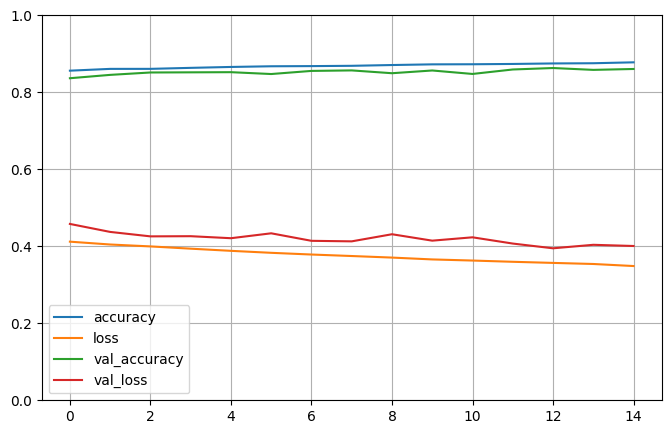

In [28]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [29]:
results = modelo.evaluate(X_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8644 - loss: 0.3959


[0.40073326230049133, 0.8604999780654907]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


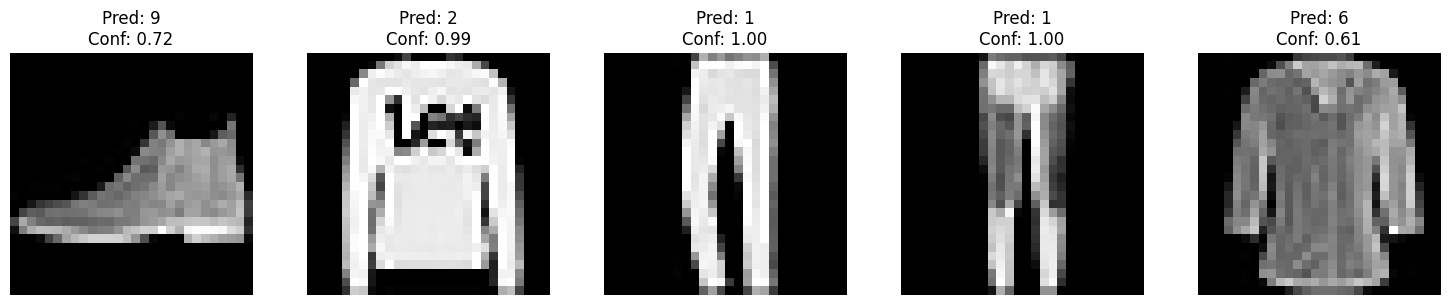

Imagen 1: Dígito predicho: 9, Confianza: 0.72
Imagen 2: Dígito predicho: 2, Confianza: 0.99
Imagen 3: Dígito predicho: 1, Confianza: 1.00
Imagen 4: Dígito predicho: 1, Confianza: 1.00
Imagen 5: Dígito predicho: 6, Confianza: 0.61


In [30]:
num_images = 5 #Definimos un número de imágenes de 5 elementos
predictions = modelo.predict(X_test[:num_images]) #Realizamos las predicciones

#Realizamos las visualizaciones:
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3)) #Añadimos subplots para las imagenes.

for i, (prediction, ax) in enumerate(zip(predictions, axes.ravel())):
    predicted_digit = np.argmax(prediction)
    confidence = prediction[predicted_digit]
    
    #Se van a ir mostrando las imagenes.
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    
    #Añadimos un título con la predicción y confianza
    ax.set_title(f"Pred: {predicted_digit}\nConf: {confidence:.2f}")

plt.tight_layout()
plt.show()

# Imprimimos por último la información adicional
for i, prediction in enumerate(predictions):
    predicted_digit = np.argmax(prediction)
    confidence = prediction[predicted_digit]
    print(f"Imagen {i+1}: Dígito predicho: {predicted_digit}, Confianza: {confidence:.2f}")

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [31]:
predicted_class = prediction.argmax() #clases

In [32]:
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']
predicted_item = class_names[predicted_class]
confidence = prediction[predicted_class]

print(f"Artículo predicho: {predicted_item}, Confianza: {confidence:.2f}")

Artículo predicho: Camisa, Confianza: 0.61


Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


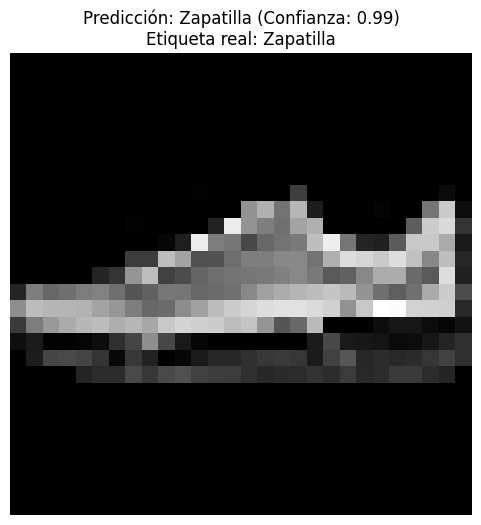

Predicción: Zapatilla
Confianza: 0.99
Etiqueta real: Zapatilla


In [33]:
index = 9  # Cambia esto al índice de la imagen que estás analizando

#Clases
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

#Obtenemos la predicción
prediction = modelo.predict(X_test[index:index+1])[0]
predicted_class = prediction.argmax()
confidence = prediction[predicted_class]

#Obtenemos la etiqueta real
true_class = y_test[index]

#Visualizamos la imagen y la información
plt.figure(figsize=(6,6))
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicción: {class_names[predicted_class]} (Confianza: {confidence:.2f})\n"
          f"Etiqueta real: {class_names[true_class]}")
plt.axis('off')
plt.show()

print(f"Predicción: {class_names[predicted_class]}")
print(f"Confianza: {confidence:.2f}")
print(f"Etiqueta real: {class_names[true_class]}")

Evalúa tu modelo con una matriz de confusión e interprétala.

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, modelo.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[824,   0,  19,  61,   1,   2,  74,   0,  19,   0],
       [  4, 960,   3,  27,   3,   0,   1,   0,   2,   0],
       [ 17,   2, 842,  22,  70,   1,  33,   0,  13,   0],
       [ 17,  10,  11, 917,  19,   0,  18,   0,   8,   0],
       [  0,   0, 153,  61, 722,   1,  52,   0,  11,   0],
       [  0,   0,   0,   1,   0, 958,   0,  27,   2,  12],
       [140,   2, 144,  64,  77,   1, 544,   0,  28,   0],
       [  0,   0,   0,   0,   0,  40,   0, 933,   0,  27],
       [  3,   1,   9,  10,   1,   4,   4,   5, 963,   0],
       [  0,   0,   0,   1,   0,  14,   0,  42,   1, 942]])

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


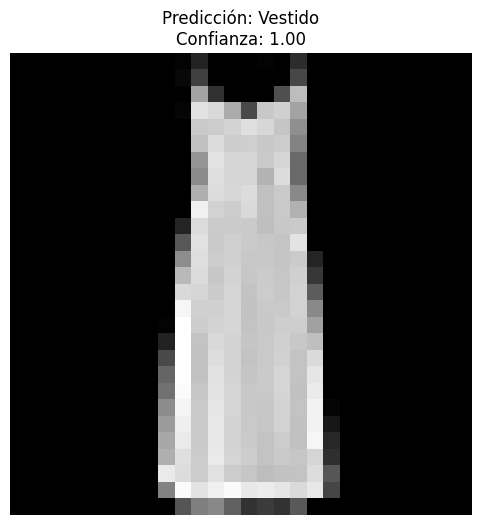

El modelo predice que la imagen es: Vestido
Confianza de la predicción: 1.00
Etiqueta real: Vestido


In [37]:
# 1. Seleccionamos una única imagen del conjunto de prueba
imagen_index = 13
single_image = X_test[imagen_index]

# 2. Preparamos la imagen para la predicción (añadimos la dimensión)
input_image = single_image.reshape(1, 28, 28)

# 3. Hacemos la predicción
prediction = modelo.predict(input_image)
predicted_class = np.argmax(prediction)
confidence = prediction[0][predicted_class]

# 4. Definimos las clases
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota']

# 5. Visualizamos la imagen y la predicción
plt.figure(figsize=(6,6))
plt.imshow(single_image, cmap='gray')
plt.title(f"Predicción: {class_names[predicted_class]}\nConfianza: {confidence:.2f}")
plt.axis('off')
plt.show()

# 6. Imprimimos la predicción
print(f"El modelo predice que la imagen es: {class_names[predicted_class]}")
print(f"Confianza de la predicción: {confidence:.2f}")
print(f"Etiqueta real: {class_names[y_test[imagen_index]]}")